# Dimensionality Reduction Practicum

### 1. Project Background

This project aims to explore and apply feature Engineering and dimensionality reduction techniques on second-hand car sales datasets. The goal is to prepare the dataset for machine learning models by creating informative features and reducing the feature space while retaining essential information.
The second-hand car market is vast, and predicting the price of a used car is a challenging task due to various factors influencing the price. Feature engineering and dimensionality reduction play a crucial role in improving the performance of predictive models by enhancing the quality of input data and reducing noise.

### 2. Load Data & Necessary Libraries

In [62]:
#import all relevant libraries

#analytics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#machine learning
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.manifold import TSNE
import umap.umap_ as umap

In [63]:
#load the dataset
df=pd.read_csv(r'D:\Advanced_Machine_Learning\datasets\second_hand_cars.csv')
df.head()

,Company Name,Car Name,Variant,Fuel Type,Tyre Condition,Make Year,Owner Type,Registration Number,Mileage,Price,Transmission Type,Body Color,Service Record,Insurance,Registration Certificate,Accessories
0,Maruti Suzuki,Cruze,EX,CNG,Needs Replacement,2018,Second,84-436-5584,52798,759107,Manual,Grey,Major Service at 50418 km,No Current Insurance,Not Available,"Music System, Sunroof, Alloy Wheels"
1,Kia,Seltos,RXE,Petrol,New,2020,Third,79-114-3166,43412,505071,Automatic,Maroon,Major Service at 131313 km,No Current Insurance,Available,NaN
2,Kia,Accord,RXE,Petrol,New,2022,Second,41-358-3344,95219,635322,Automatic (Tiptronic),Black,No Service Record,No Current Insurance,Available,NaN
3,Nissan,Seltos,Highline,Diesel,Used,2024,Third,92-708-1763,70370,483152,Automatic (Tiptronic),Maroon,Major Service at 98115 km,Valid Until [date],Available,"Music System, Alloy Wheels"
4,Chevrolet,Kwid,Highline,Petrol,Used,2018,Second,76-154-5485,85852,712961,Automatic (Tiptronic),Silver,Major Service at 135665 km,No Current Insurance,Not Available,"GPS, Music System"


### 3. Data Pre-processing

In [64]:
#handling missingness & duplicates
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company Name              2500 non-null   object
 1   Car Name                  2500 non-null   object
 2   Variant                   2238 non-null   object
 3   Fuel Type                 2500 non-null   object
 4   Tyre Condition            2500 non-null   object
 5   Make Year                 2500 non-null   int64 
 6   Owner Type                2500 non-null   object
 7   Registration Number       2500 non-null   object
 8   Mileage                   2500 non-null   int64 
 9   Price                     2500 non-null   int64 
 10  Transmission Type         2500 non-null   object
 11  Body Color                2500 non-null   object
 12  Service Record            2500 non-null   object
 13  Insurance                 2500 non-null   object
 14  Registration Certificate

There is missingness in only 2 features, Variant and Accesories, explore missingness even further by quantifying the missingess..

In [65]:
#how much missingness does each have
total_missing=df.isnull().sum().sort_values(ascending=False)
portion_missing=total_missing/df.isnull().count().sort_values(ascending=False)
missing_df=pd.concat([total_missing,portion_missing],axis=1,keys=['total missing','percent missing'],sort=False)
missing_df.index.name='variable'# set the index name to variable 
missing_df=missing_df[total_missing>0] # only retain those with missing values 
missing_df['percent missing']=missing_df['percent missing'].map(lambda x:x*100) # convert to percentage 
missing_df

,total missing,percent missing
variable,,
Accessories,482,19.28
Variant,262,10.48


Because only a small percent of the training samples are missing, these make them good candidates for imputation. For the variant, I will impute with mode since the data is categorical, but for the Accesories I will opt to replace all missingness with 'None'/'No Accesories'. Why? Because, it could be that the values are not actually missing, the null values could be because that particular car has no accessories like music systems, alloy wheels, sun roofs and etc.

In [66]:
#resolve missingness in variant feature
df['Variant'].fillna(df['Variant'].mode()[0], inplace=True)

C:\Users\Wambui\AppData\Local\Temp\ipykernel_13932\30346414.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Variant'].fillna(df['Variant'].mode()[0], inplace=True)


In [67]:
#resolve missingness in accesories feature
df['Accessories'].fillna('No Accesories',inplace=True)

C:\Users\Wambui\AppData\Local\Temp\ipykernel_13932\4182280200.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Accessories'].fillna('No Accesories',inplace=True)


In [68]:
#Let's check if we have any missingness
df.isnull().sum()

Company Name                0
Car Name                    0
Variant                     0
Fuel Type                   0
Tyre Condition              0
Make Year                   0
Owner Type                  0
Registration Number         0
Mileage                     0
Price                       0
Transmission Type           0
Body Color                  0
Service Record              0
Insurance                   0
Registration Certificate    0
Accessories                 0
dtype: int64

In [69]:
#next check for and remove any duplicates
df.drop_duplicates()

,Company Name,Car Name,Variant,Fuel Type,Tyre Condition,Make Year,Owner Type,Registration Number,Mileage,Price,Transmission Type,Body Color,Service Record,Insurance,Registration Certificate,Accessories
0,Maruti Suzuki,Cruze,EX,CNG,Needs Replacement,2018,Second,84-436-5584,52798,759107,Manual,Grey,Major Service at 50418 km,No Current Insurance,Not Available,"Music System, Sunroof, Alloy Wheels"
1,Kia,Seltos,RXE,Petrol,New,2020,Third,79-114-3166,43412,505071,Automatic,Maroon,Major Service at 131313 km,No Current Insurance,Available,No Accesories
2,Kia,Accord,RXE,Petrol,New,2022,Second,41-358-3344,95219,635322,Automatic (Tiptronic),Black,No Service Record,No Current Insurance,Available,No Accesories
3,Nissan,Seltos,Highline,Diesel,Used,2024,Third,92-708-1763,70370,483152,Automatic (Tiptronic),Maroon,Major Service at 98115 km,Valid Until [date],Available,"Music System, Alloy Wheels"
4,Chevrolet,Kwid,Highline,Petrol,Used,2018,Second,76-154-5485,85852,712961,Automatic (Tiptronic),Silver,Major Service at 135665 km,No Current Insurance,Not Available,"GPS, Music System"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Toyota,Elantra,RXE,Petrol,New,2015,First,36-450-8953,171112,643581,Automatic,Maroon,Major Service at 105579 km,No Current Insurance,Available,"Music System, Sunroof"
2496,Kia,Sunny,LE,CNG,Needs Replacement,2024,Second,77-453-7512,93545,889661,Manual,White,Major Service at 112605 km,Valid Until [date],Not Available,"Music System, GPS"
2497,Nissan,Sunny,RXE,Diesel,Used,2022,Third,52-366-2337,47285,327520,Automatic (Tiptronic),Gold,Full Service History,Valid Until [date],Not Available,"Alloy Wheels, Sunroof"
2498,Honda,Swift,XL,CNG,Needs Replacement,2019,Second,10-872-5236,67437,348921,Manual,Red,Full Service History,Valid Until [date],Not Available,"Leather Seats, Sunroof, Alloy Wheels, Music Sy..."


Great, now we are working with clean data....after this step, ideally you would go into Exploratory Data Analysis, but for class, we will jump straight into feature engineering.

### 4. Feature Engineering

#### 4.1 Extracting car age from Year of Manufacturer

In [70]:
#first convert the column to date time data type
from datetime import datetime
df['Make Year']=pd.to_datetime(df['Make Year'])
#set the year
current_year=2024

def car_age(yom):
    current_year=datetime.today().year
    age= current_year-yom.year
    return age

In [71]:
df['Car Age']=df['Make Year'].apply(car_age)

What other features can we extract from the features?

### 5. Data Encoding

In [72]:
#split data into, categorical, numerical and temporal
num_df=df.select_dtypes(include=[np.number])
cat_df=df.select_dtypes(include=[object])

In [73]:
cat_df.drop('Registration Number',axis=1 ,inplace=True)


In [74]:
#one hot encoding

ohe=OneHotEncoder(sparse_output=False)
ohe_transform=ohe.fit_transform(cat_df)
encoded_df = pd.DataFrame(ohe_transform, columns=ohe.get_feature_names_out(cat_df.columns))
encoded_df.index = cat_df.index
final_df=pd.concat([num_df,encoded_df],axis=1)
final_df.head()

,Mileage,Price,Car Age,Company Name_Chevrolet,Company Name_Ford,Company Name_Honda,Company Name_Hyundai,Company Name_Kia,Company Name_Maruti Suzuki,Company Name_Nissan,...,"Accessories_Sunroof, Leather Seats, Music System, GPS","Accessories_Sunroof, Music System","Accessories_Sunroof, Music System, Alloy Wheels","Accessories_Sunroof, Music System, Alloy Wheels, GPS","Accessories_Sunroof, Music System, Alloy Wheels, Leather Seats","Accessories_Sunroof, Music System, GPS","Accessories_Sunroof, Music System, GPS, Alloy Wheels","Accessories_Sunroof, Music System, GPS, Leather Seats","Accessories_Sunroof, Music System, Leather Seats","Accessories_Sunroof, Music System, Leather Seats, GPS"
0,52798,759107,56,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,43412,505071,56,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,95219,635322,56,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,70370,483152,56,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,85852,712961,56,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
final_df.shape

(2500, 1109)

See, we now have some very high dimensional data which we are going to reduce using the techniques we learned this week.

### 6. Dimensionality Reduction

As you learned in the last session, most of the dimensionality reduction methods are distance based. They have a distance component, so the very first step in dimensionality reduction is feature scaling. Remember also, that all the dimensionality reeuction techniques require SCALED & NUMERIC data!

In [76]:
#spilt the data before scaling
X = final_df.drop('Price', axis=1)
y = final_df['Price']
print(X.shape,y.shape)

(2500, 1108) (2500,)


In [77]:
#perform standard scaling
scaler=RobustScaler()
X_scaled=scaler.fit_transform(X)

Applying PCA

In [83]:
pca=PCA(n_components=10)
#pca=PCA(0.95)
X_pca=pca.fit_transform(X_scaled)
X_pca.shape

(2500, 10)

In [84]:
pca.explained_variance_ratio_*100

array([5.49669262, 5.35962224, 4.00343436, 3.89464505, 3.84651704,
       3.73927114, 3.59216438, 3.53399212, 3.45171834, 3.41233703])

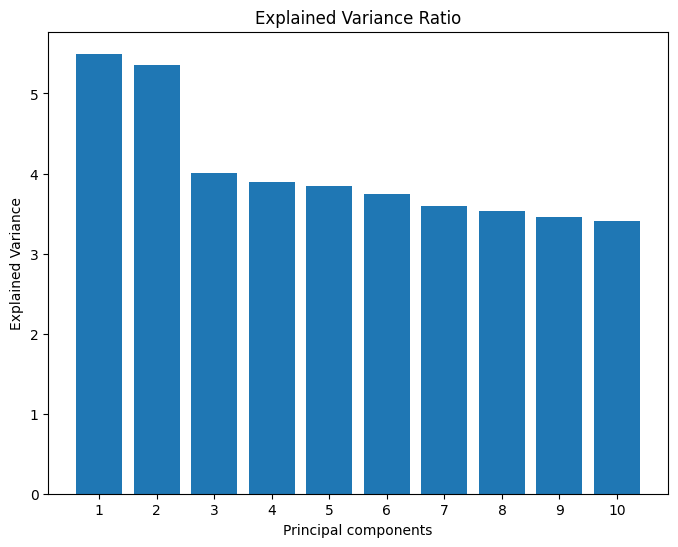

In [85]:
# Plot the explained Variance
plt.figure(figsize=(8,6))
#_values = np.arange(pca.n_components_) + 1
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_*100)
plt.xlabel("Principal components")
plt.ylabel("Explained Variance")
plt.title("Explained Variance Ratio")
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.show()

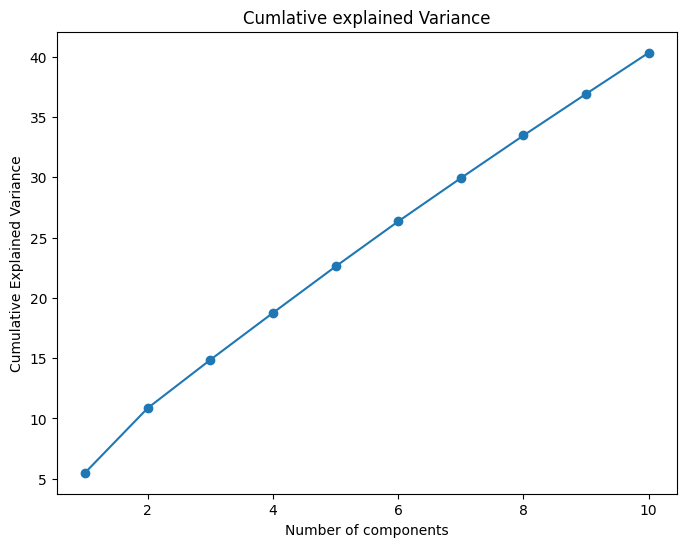

In [81]:
# Cummulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_*100)

# Plot the cumulative explained variance
plt.figure(figsize=(8,6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel("Number of components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumlative explained Variance")
plt.show()


Non-Linear Dimensionality Reduction Methods

In [86]:
kpca=KernelPCA(n_components=10)
#pca=PCA(0.95)
X_pca=kpca.fit_transform(X_scaled)
X_pca.shape

(2500, 10)

In [88]:
kpca.explained_variance_ratio_*100

AttributeError: 'KernelPCA' object has no attribute 'explained_variance_ratio_'

Apply TSNE

Apply UMAP